In [20]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from prophet import Prophet

In [21]:
# Read in CSV
df = pd.read_csv('Raw_Data_CSV/Total Energy Consumption By State.csv', skiprows=2)

# Clean up the DataFrame by dropping NaN values
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='all')

# Display the first and last 10 rows
display(df.head(10))
display(df.tail(10))


,State,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AK,"59,303","70,020","76,642","78,488","82,793","85,319","100,481","112,625","119,992",...,"587,460","586,053","602,906","582,922","590,212","593,292","595,231","629,029","688,282","724,059"
1,AL,"842,283","806,682","853,424","885,811","949,411","1,011,125","1,055,347","1,100,904","1,208,038",...,"1,882,362","1,929,314","1,880,544","1,895,744","1,867,484","1,913,464","1,883,941","1,793,090","1,924,516","1,902,374"
2,AR,"417,153","423,192","446,994","474,761","515,874","515,759","553,146","581,814","620,382",...,"1,092,848","1,108,345","1,043,455","1,036,998","1,043,543","1,103,282","1,078,044","1,010,754","1,054,467","1,052,517"
3,AZ,"273,431","294,660","313,581","337,213","357,961","362,858","390,820","400,280","442,172",...,"1,419,110","1,422,839","1,439,724","1,462,217","1,462,699","1,474,472","1,493,085","1,435,329","1,481,293","1,526,882"
4,CA,"3,360,697","3,513,822","3,623,382","3,825,677","4,112,125","4,267,121","4,525,141","4,703,411","4,979,463",...,"7,162,622","7,073,527","7,169,881","7,168,226","7,176,823","7,317,326","7,258,664","6,462,830","6,808,107","6,882,442"
5,CO,"417,013","453,816","459,822","457,373","488,833","498,729","521,816","543,833","611,043",...,"1,417,745","1,429,945","1,437,163","1,392,337","1,395,893","1,444,798","1,482,498","1,348,654","1,388,899","1,464,010"
6,CT,"496,298","505,953","523,254","532,247","549,692","554,317","593,831","606,150","630,827",...,"744,468","748,487","754,313","722,145","725,063","750,548","729,817","660,310","692,868","707,635"
7,DC,"115,737","113,840","115,913","116,637","127,494","153,758","164,156","176,165","175,877",...,"166,265","169,997","169,393","163,675","155,184","161,998","157,272","132,125","139,840","141,046"
8,DE,"153,726","147,678","158,977","169,737","169,803","180,486","188,475","182,891","201,693",...,"276,486","276,230","280,069","276,549","274,181","292,542","291,342","263,492","280,811","274,796"
9,FL,"783,376","820,633","917,001","962,029","1,013,935","1,071,226","1,138,189","1,174,126","1,297,961",...,"4,107,826","4,152,863","4,303,081","4,338,511","4,320,757","4,405,578","4,330,771","3,947,125","4,251,080","4,324,987"


,State,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
42,TN,"901,868","918,819","952,585","1,002,040","1,027,256","1,073,130","1,169,002","1,168,508","1,222,239",...,"2,040,820","2,126,349","2,096,498","2,138,385","2,066,085","2,141,312","2,090,695","1,938,685","2,099,705","2,101,812"
43,TX,"4,360,558","4,390,700","4,574,179","4,826,435","4,940,057","5,130,088","5,473,345","5,780,021","6,168,197",...,"12,398,030","12,360,173","12,477,122","12,630,351","12,738,502","13,544,283","13,724,994","12,974,842","13,712,230","13,780,584"
44,UT,"297,816","295,102","304,207","305,867","328,529","334,068","345,393","339,353","359,857",...,"813,530","784,843","787,248","788,797","798,502","818,984","831,962","801,446","821,273","848,682"
45,VA,"832,709","834,806","861,694","917,827","945,535","1,018,832","1,089,208","1,105,033","1,164,157",...,"2,386,730","2,442,590","2,404,230","2,382,831","2,361,210","2,450,678","2,418,279","2,223,267","2,373,207","2,427,849"
46,VT,"66,721","70,058","72,746","72,658","70,042","80,804","88,469","91,481","97,423",...,"134,337","137,295","136,505","130,827","129,546","133,404","132,867","119,310","122,094","124,779"
47,WA,"765,416","781,340","815,155","856,629","914,648","946,205","1,009,305","1,055,494","1,154,184",...,"1,550,302","1,528,965","1,562,109","1,633,128","1,633,031","1,625,145","1,700,562","1,428,797","1,535,333","1,571,449"
48,WI,"832,218","854,807","894,005","917,225","950,639","1,003,599","1,065,011","1,106,590","1,153,728",...,"1,804,218","1,852,766","1,784,072","1,765,534","1,782,008","1,861,181","1,811,336","1,664,655","1,724,763","1,768,616"
49,WV,"600,357","630,635","636,728","671,815","709,893","733,287","752,206","717,477","785,300",...,"740,270","771,872","758,649","751,785","741,661","816,921","816,508","787,255","837,569","835,489"
50,WY,"140,236","153,279","171,561","161,170","161,238","169,369","176,810","200,843","221,358",...,"527,542","523,144","495,434","491,418","520,703","544,649","532,950","484,585","482,441","496,162"
51,US,"43,935,276","44,557,699","46,543,126","48,409,682","50,494,169","52,577,565","55,573,431","57,335,511","60,820,699",...,"94,237,461","95,328,233","94,472,508","94,086,508","93,906,347","97,404,148","96,576,100","88,870,847","93,349,660","94,773,722"


In [22]:
# Set Data Range to include data from 1970 to 2022
columns_to_keep = ['State'] + list(map(str, range(1970, 2023)))
df_filtered = df[columns_to_keep]

# Remove commas from the numeric columns and convert them to numeric
for col in df_filtered.columns[1:]:
    df_filtered.loc[:, col] = pd.to_numeric(df_filtered[col].str.replace(',', ''), errors='coerce')

# Conversion factor from BTU to kWh
BTU_to_kWh = 0.00029307107

# Apply the conversion to all numeric columns (from 1970 to 2022)
for col in df_filtered.columns[1:]:
    df_filtered.loc[:, col] = df_filtered[col] * BTU_to_kWh

# Display the updated DataFrame
df_filtered.head()


,State,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AK,52.597465,58.143835,62.120516,57.13948,58.377999,67.311391,73.847755,84.959252,93.996977,...,172.167531,171.75518,176.694307,170.837574,172.974062,173.876721,174.444986,184.350202,201.715542,212.200746
1,AL,395.471567,392.33981,419.264249,433.520105,437.635995,429.580351,440.697709,464.435586,465.905337,...,551.665845,565.426118,551.133042,555.587723,547.305534,560.780942,552.128605,525.502805,564.019963,557.530784
2,AR,202.774701,199.988474,212.728567,234.809127,227.750218,223.78438,239.903582,254.293078,253.085919,...,320.282133,324.823855,305.806473,303.914113,305.832264,323.340036,315.943509,296.222756,309.033772,308.462283
3,AZ,147.381338,156.663485,174.521478,190.097033,190.737686,185.843985,195.727221,211.01205,212.300976,...,415.900086,416.992948,421.941453,428.533501,428.674761,432.125087,437.580019,420.653406,434.124124,447.484942
4,CA,1567.646825,1637.042537,1673.338803,1726.285609,1656.282067,1715.081795,1763.59678,1826.704066,1850.324129,...,2099.157294,2073.046127,2101.284696,2100.799664,2103.319196,2144.49656,2127.304425,1894.068503,1995.259203,2017.044641


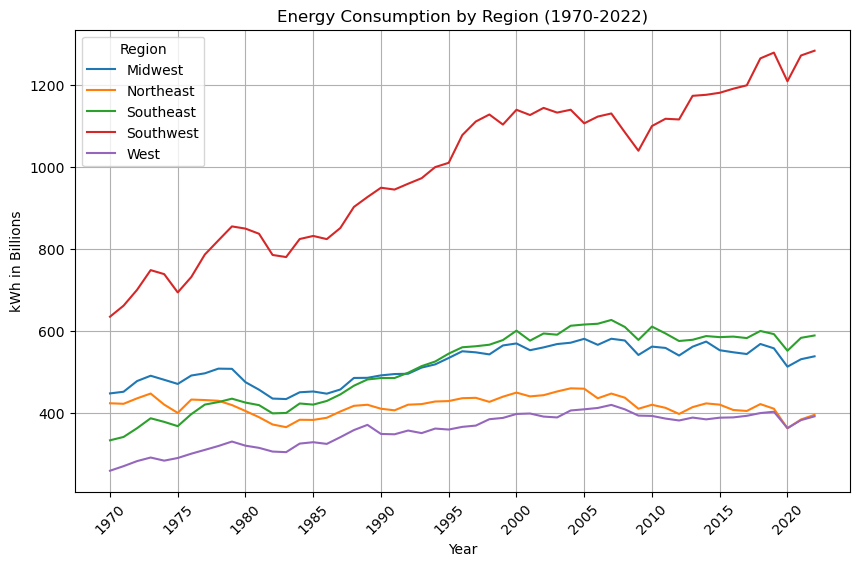

In [23]:
# Full mapping of states to U.S. regions
state_to_region = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 'RI': 'Northeast',
    'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',

    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest',

    # Southeast
    'DE': 'Southeast', 'FL': 'Southeast', 'GA': 'Southeast', 'MD': 'Southeast', 'NC': 'Southeast',
    'SC': 'Southeast', 'VA': 'Southeast', 'WV': 'Southeast', 'AL': 'Southeast', 'KY': 'Southeast',
    'MS': 'Southeast', 'TN': 'Southeast', 'AR': 'Southeast', 'LA': 'Southeast',

    # Southwest
    'AZ': 'Southwest', 'NM': 'Southwest', 'OK': 'Southwest', 'TX': 'Southwest',

    # West
    'AK': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West',
    'OR': 'West', 'UT': 'West', 'WA': 'West', 'WY': 'West'
}

# Calculating the Average by Region
state_to_region
df_filtered = df_filtered.copy()
df_filtered['State'] = df_filtered['State'].str.strip()
df_filtered.loc[:, 'Region'] = df_filtered['State'].map(state_to_region)
columns_to_group = ['Region'] + list(map(str, range(1970, 2023)))
regional_avg_years = df_filtered[columns_to_group].groupby('Region').mean()

# Transpose the DataFrame to have years as the index for easier plotting
regional_avg_years = regional_avg_years.T
plt.figure(figsize=(10,6))

# Plot for each region
for region in regional_avg_years.columns:
    plt.plot(regional_avg_years.index, regional_avg_years[region], label=region)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('kWh in Billions')
plt.title('Energy Consumption by Region (1970-2022)')
plt.legend(title='Region')
plt.grid(True)

# Rotate x-axis labels and adjust the tick frequency
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))  # Shows for every 5 years

# Show the plot
plt.show()


,State,2022
43,TX,4038.690498
4,CA,2017.044641
9,FL,1267.528568
18,LA,1244.37566
38,PA,1095.173472
14,IL,1077.225799
35,OH,1026.690089
34,NY,1011.879743
10,GA,831.216375
22,MI,793.296788


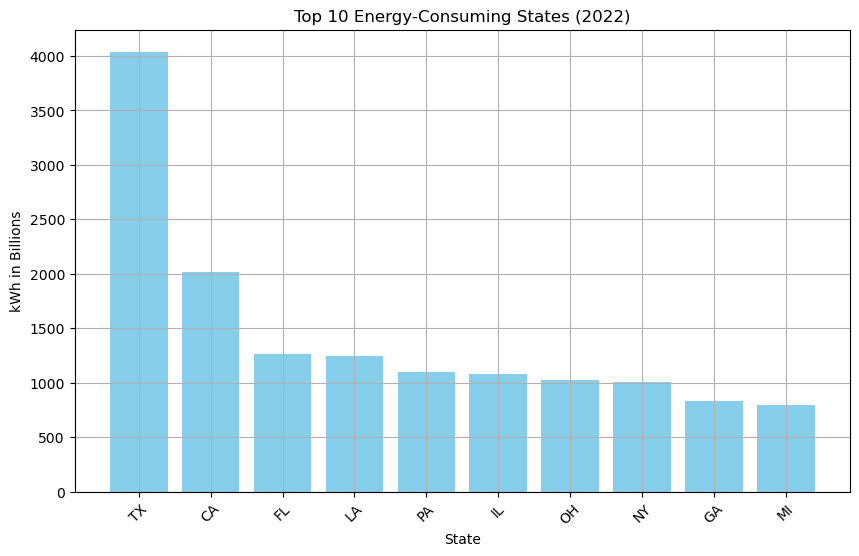

In [24]:
# Filter out the 'US' row from the DataFrame
df_filtered_no_us = df_filtered[df_filtered['State'] != 'US']

# Sort the DataFrame by energy consumption in 2022 and select the top 10 states
top_10_states = df_filtered_no_us[['State', '2022']].sort_values(by='2022', ascending=False).head(10)

# Display the top 10 states
display(top_10_states)

# Show the plot
plt.figure(figsize=(10,6))
plt.bar(top_10_states['State'], top_10_states['2022'], color='skyblue')
plt.xlabel('State')
plt.ylabel('kWh in Billions')
plt.title('Top 10 Energy-Consuming States (2022)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


,State,2022
46,VT,36.569115
7,DC,41.336502
39,RI,54.701715
11,HI,79.230298
8,DE,80.534758
30,NH,87.108928
21,ME,98.275522
41,SD,105.025535
26,MT,115.84777
50,WY,145.410728


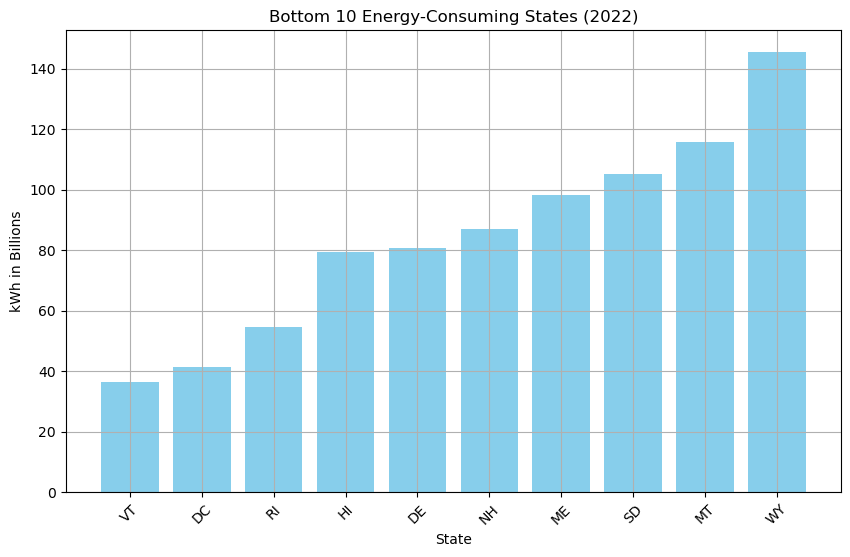

In [25]:
# Sort the DataFrame by energy consumption in 2022 and select the bottom 10 states
bottom_10_states = df_filtered_no_us[['State', '2022']].sort_values(by='2022', ascending=True).head(10)

# Display the bottom 10 states
display(bottom_10_states)

# Show the plot
plt.figure(figsize=(10,6))
plt.bar(bottom_10_states['State'], bottom_10_states['2022'], color='skyblue')
plt.xlabel('State')
plt.ylabel('kWh in Billions')
plt.title('Bottom 10 Energy-Consuming States (2022)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [57]:
# Prophet Preparation
df_for_prophet = regional_avg_years.reset_index()
df_for_prophet = df_for_prophet.melt(id_vars=['index'], var_name='Region', value_name='Energy')
df_for_prophet.rename(columns={'index': 'ds', 'Energy': 'y'}, inplace=True)


# Prediction dictionaries
models = {}
forecasts = {}

# Prophet predictions
for region in df_for_prophet['Region'].unique():
    df_region = df_for_prophet[df_for_prophet['Region'] == region][['ds', 'y']]
    
    model = Prophet()
    
    model.fit(df_region)
    
    future = model.make_future_dataframe(periods=13, freq='YE')  # 13 years from 2022 to 2035
    
    forecast = model.predict(future)
    
    models[region] = model
    forecasts[region] = forecast

19:51:23 - cmdstanpy - INFO - Chain [1] start processing
19:51:23 - cmdstanpy - INFO - Chain [1] done processing
19:51:24 - cmdstanpy - INFO - Chain [1] start processing
19:51:24 - cmdstanpy - INFO - Chain [1] done processing
19:51:24 - cmdstanpy - INFO - Chain [1] start processing
19:51:24 - cmdstanpy - INFO - Chain [1] done processing
19:51:24 - cmdstanpy - INFO - Chain [1] start processing
19:51:24 - cmdstanpy - INFO - Chain [1] done processing
19:51:24 - cmdstanpy - INFO - Chain [1] start processing
19:51:25 - cmdstanpy - INFO - Chain [1] done processing


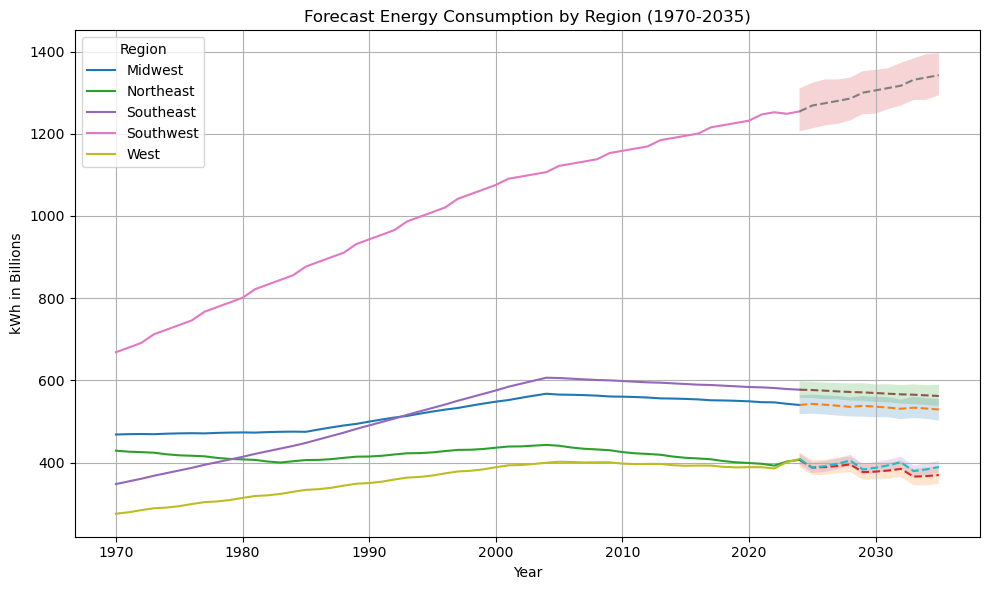

In [67]:
plt.figure(figsize=(10, 6))

# Plotting historical (1970–2022) and forecast (2023–2035)
for region in df_for_prophet['Region'].unique():
    forecast = forecasts[region]
    
    # Historical and forecast separation
    forecast_historical = forecast[forecast['ds'].dt.year <= 2023]
    forecast_future = forecast[forecast['ds'].dt.year >= 2023]
    
    # Ploting historical data (1970–2022)
    plt.plot(forecast_historical['ds'], forecast_historical['yhat'], label=f'{region}', linestyle='solid')
    
    # Plotting predictions from 2023 onwards
    plt.plot(forecast_future['ds'], forecast_future['yhat'], linestyle='dashed')
    
    # Plotting uncertainty
    plt.fill_between(forecast_future['ds'], forecast_future['yhat_lower'], forecast_future['yhat_upper'], alpha=0.2)

# Plot details
plt.xlabel('Year')
plt.ylabel('kWh in Billions')
plt.title('Forecast Energy Consumption by Region (1970-2035)')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()